## 실습 : 유튜브에 있는 영상의 제목 및 링크 수집하기

#### 주의 : 밑에 있는 폴더 위치, 타겟의 URL은 원하는 옵션에 맞게 수정을 할 것

In [18]:
# 라이브러리 불러오기

while(True) :
    try :
        import os  # 운영체제 관련 작업 (폴더 생성, 삭제 등)
        break
    except ModuleNotFoundError:
        !pip install os
    
while(True) :
    try :
        # 페이지 로딩 시간을 부여하는 라이브러리
        import time  # 시간 관련 기능 (대기, 지연)
        break
    except ModuleNotFoundError:
        !pip install time 
    
while(True) :
    try:
        # 컴퓨터용 브라우저
        # 컴퓨터용 키보드
        # 선택지 지정방식
        from selenium import webdriver as wb
        from selenium.webdriver.common.keys import Keys
        from selenium.webdriver.common.by import By 
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.chrome.options import Options
        break
    except ModuleNotFoundError:
        !pip install selenium

while(True) :
    try :
        # 랭과 열로 이루어진 표와 같은 형태를 다룰 수 있는 라이브러리
        import pandas as pd 
        break
    except ModuleNotFoundError :
        !pip install pandas

print(f'필요한 라이브러리 import 완료')

필요한 라이브러리 import 완료


In [19]:
# 사용자의 환경마다 수정이 필요한 변수들

# 원하는 폴더의 위치
folder_locate = "C:\\Users\\smhrd1\\Documents\\GitHub\\Crawling\\Study"

# 수집을 원하는 유튜버의 동영상목록 링크  
target_video_link = 'https://www.youtube.com/@ootbstudio/videos'

# 조사할 영상의 최대 수 
max_video = 5

# 각 영상별 조사할 댓글의 최대 수
max_comment = 50

In [20]:
# 전체적으로 관리할 변수를 관리

# 조사할 동영상의 수
MAX_VIDEO_LEN = max_video
# 조사할 각 영상별 댓글의 수
MAX_COMMENT_LEN = max_comment

# 파일을 저장할 폴더의 위치  
ORIGIN_URL = folder_locate
# 파일을 저장할 폴더를 이름
FOLDER_NAME = 'youtube_list'

# 내가 수집하는 유튜브의 동영상 링크 
YOUTUBE_URL = target_video_link

# 내가 수집하는 유투브의 이름(자동으로 처리)
YOUTUBER_NAME = YOUTUBE_URL.split('@')[-1].split('/')[0]

# 수집하려는 영상 제목의 ID값
VIDEO_TITLE_ID = 'video-title-link'
# 수집하려는 영상 링크의 ID값
VIDEO_URL_ID = 'video-title-link'

# 수집하려는 영상의 댓글 CLASS값
COMMENT_CLASS = 'yt-attributed-string.style-scope.ytd-comment-view-model > span.yt-core-attributed-string.yt-core-attributed-string--white-space-pre-wrap'

# csv로 저장하려는 파일의 이름
FILE_NAME = f'{YOUTUBER_NAME}' + '_youtube_video_list'

# 최종적으로 가지고 있을 유튜브의 정보들
# 영상의 이름들을 보관할 리스트
get_all_title = []
# 영상의 링크들을 보관할 리스트
get_all_url = []
# 각 영상별 댓글을 보관할 리스트
get_all_comment = []

# 웹 브라우저를 가지고 있을 변수
driver = None

In [21]:
# 크롬을 시작하고, 사이트에 접속할 함수
def web_start() :
    global driver
    
    chrome_options = Options()
    
    # 브라우저 배율을 25%로 설정
    chrome_options.add_argument("--force-device-scale-factor=0.5") 

    # 크롬 드라이버 실행
    driver = wb.Chrome(options=chrome_options)
    
    driver.get(YOUTUBE_URL)
    time.sleep(3)

In [22]:
# input값(ID)를 통해 모든 elements를 수집하는 함수
def find_elements_ID(input) : 
    try :
        fint_result = driver.find_elements(By.ID, input)
        return fint_result
    except :
        return 0 
        
def find_elements_CLASS(input) : 
    try :
        fint_result = driver.find_elements(By.CSS_SELECTOR, input)
        return fint_result
    except :
        return 0 

In [23]:
# 공통 스크롤 함수
def scroll_page():
    body = driver.find_element(By.TAG_NAME, 'body')  # 페이지의 바디를 찾기
    body.send_keys(Keys.END)  # 바디에서 스크롤을 위한 'END'버튼 클릭
    time.sleep(1.5)  # 페이지 로딩을 위한 1초 로딩

# 페이지를 비디오 수에 맞춰서 스크롤하는 함수
def page_video_Scroll():
    global MAX_VIDEO_LEN
    while(True):
        origin_title = len(find_elements_ID(VIDEO_TITLE_ID))  # 페이지 검사를 위한 사전 타이틀 수 파악

        if(origin_title >= MAX_VIDEO_LEN):
            print(f'{MAX_VIDEO_LEN}개의 영상을 찾았습니다. ')
            break
            
        scroll_page()  # 페이지 스크롤
        later_title = len(find_elements_ID(VIDEO_TITLE_ID))  # 페이지 검사를 위한 타이틀 수 파악
        
        if(later_title >= MAX_VIDEO_LEN):
            print(f'{MAX_VIDEO_LEN}개의 영상을 찾았습니다. ')
            break
            
        elif(origin_title == later_title): 
            print("페이지의 끝인지 검사중...")
            scroll_page()  # 페이지 스크롤
            time.sleep(2)
            check_title = len(find_elements_ID(VIDEO_TITLE_ID))  # 페이지 검사를 위한 타이틀 수 파악
            if (check_title == later_title): 
                print(f'페이지가 끝났습니다. 최종 영상의 수 : ', check_title)
                break
            else:
                print("페이지가 아직 끝나지 않아 스크롤을 다시 시작합니다. 현재 영상의 수 : ", check_title) 

# 페이지에서 댓글 수를 파악해 가며 스크롤을 내리는 함수
def comment_Scroll():
    global MAX_COMMENT_LEN
    while(True):
        origin_comment = len(find_elements_CLASS(COMMENT_CLASS))  # 페이지 검사를 위한 사전 댓글 수 파악
       
        if(origin_comment >= MAX_COMMENT_LEN + 1):
            print(f'{MAX_COMMENT_LEN}개의 댓글을 찾았습니다. ')
            break
            
        scroll_page()  # 페이지 스크롤
        later_comment = len(find_elements_CLASS(COMMENT_CLASS))  # 페이지 검사를 위한 댓글 수 파악

        if(later_comment >= MAX_COMMENT_LEN + 1):
            print(f'{MAX_COMMENT_LEN}개의 댓글을 찾았습니다. ')
            break
            
        elif(origin_comment == later_comment) :
            print("페이지의 끝인지 검사중...")
            scroll_page()  # 페이지 스크롤
            time.sleep(5)
            check_comment = len(find_elements_CLASS(COMMENT_CLASS))  # 페이지 검사를 위한 댓글 수 파악
            
            if (check_comment == later_comment) :  
                print(f'페이지가 끝났습니다. 최종 댓글의 수 : ', check_comment - 1)
                break
            else:
                print("페이지가 아직 끝나지 않아 스크롤을 다시 시작합니다. 현재 댓글의 수 : ", check_comment - 1) 


In [24]:
# 모든 타이틀을 수집하는 함수
def get_All_Title() :  
    temp_list = find_elements_ID(VIDEO_TITLE_ID) 
    temp_get_all_title = [i.text for i in temp_list]
    
    # MAX_VIDEO_LEN개 까지만 수집하거나 더 이상 데이터가 없을 때까지 수집
    for i in temp_get_all_title:
        if len(get_all_title) >= MAX_VIDEO_LEN:
            break
        get_all_title.append(i)
    
    print(f'{len(get_all_title)}개의 제목 데이터를 수집 완료')

In [25]:
# 모든 링크를 수집하는 함수
def get_All_Url() :
    temp_list = find_elements_ID(VIDEO_URL_ID) 
    temp_get_all_url = [element.get_attribute("href") for element in temp_list]
    
    # MAX_VIDEO_LEN개 까지만 수집하거나 더 이상 데이터가 없을 때까지 수집
    for i in temp_get_all_url:
        if len(get_all_url) >= MAX_VIDEO_LEN:
            break
        get_all_url.append(i)
    
    print(f'{len(get_all_url)}개의 제목 링크 데이터를 수집 완료')


In [26]:
# 현재 페이지에 있는 댓글을 수집하는 함수
def get_All_Comment():
    temp = []
    temp_get_all_comment = find_elements_CLASS(COMMENT_CLASS)  # 페이지 검사를 위한 사전 댓글 수 파악
    
    for idx, i in enumerate(temp_get_all_comment):
        if len(temp) >= MAX_COMMENT_LEN:
            break
        if idx == 0:  # 첫 번째 댓글은 건너뜀
            continue
        temp.append(str(i.text))  # 첫 번째 댓글을 제외한 나머지 댓글을 추가
     
    get_all_comment.append(temp)  
    print(f'{len(temp) - 1}개의 댓글 데이터를 수집 완료')


In [27]:
# 폴더를 생성하고 이동하는 함수
def make_folder() :
    try :
        os.chdir(ORIGIN_URL)
        print(f'{ORIGIN_URL}로 이동 성공')
    except : 
        print(f'{ORIGIN_URL}로 이동 실패')
        return False
        
    try : 
        os.mkdir(FOLDER_NAME)
        print(f'{FOLDER_NAME} 폴더를 생성했씁니다.')
    except :
        print(f'{FOLDER_NAME} 폴더가 이미 있습니다.')

    # 생성했거나, 이미 있는 폴더로 이동
    os.chdir(FOLDER_NAME)
    
    return True

# csv 파일로 저장하는 함수
def make_csv():
    global get_all_title, get_all_url, get_all_comment 
    make_folder_check = make_folder()
    if not make_folder_check:
        print(f'폴더 이동에 실패하여 지금 위치에 파일을 생성합니다. ')
    
    # get_all_comment의 길이를 get_all_title과 get_all_url에 맞추기
    max_len = max(len(get_all_title), len(get_all_url))
    
    # 부족한 길이를 None으로 채우기
    get_all_comment = get_all_comment[:max_len]  # 만약 get_all_comment가 너무 길면 자르기
    get_all_comment.extend([None] * (max_len - len(get_all_comment)))  # 부족한 부분을 None으로 채우기
    
    pd.set_option('display.max_colwidth', None)
    
    # DataFrame 생성
    df = pd.DataFrame({'제목': get_all_title, '링크': get_all_url, '댓글': get_all_comment})
    df.index = df.index + 1  
    
    # 파일 이름 생성
    file_index = 0
    new_file_name = None
    while(True):
        new_file_name = f"{FILE_NAME}_{file_index:04}.csv" 
        
        # 파일 이름 중복 확인
        name_check = os.path.isfile(new_file_name)
        if name_check:
            # 동일명의 파일이 있다면
            file_index += 1
        else:
            # 파일이 없다면
            break
    
    try:
        # CSV 파일로 저장
        df.to_csv(new_file_name, encoding='utf-8') 
        print(f'{new_file_name} 파일을 성공적으로 생성했습니다.')
    except:
        print(f'{new_file_name} 파일 생성 실패...')


In [28]:
# 특절 페이지로 접속하여 댓글을 수집하는 함수
def get_comment_in_url() : 
    for i in get_all_url : 
        driver.get(i) 
        time.sleep(3)
        comment_Scroll()
        get_All_Comment()
        

In [29]:
# 브라우저를 닫는 함수
def web_close() :
    driver.close() 
    print(f'시스템이 종료되었습니다.')

In [30]:
web_start()
page_video_Scroll()
get_All_Title()
get_All_Url()
get_comment_in_url()
web_close()
make_csv() 

5개의 영상을 찾았습니다. 
5개의 제목 데이터를 수집 완료
5개의 제목 링크 데이터를 수집 완료
50개의 댓글을 찾았습니다. 
49개의 댓글 데이터를 수집 완료
50개의 댓글을 찾았습니다. 
49개의 댓글 데이터를 수집 완료
50개의 댓글을 찾았습니다. 
49개의 댓글 데이터를 수집 완료
50개의 댓글을 찾았습니다. 
49개의 댓글 데이터를 수집 완료
50개의 댓글을 찾았습니다. 
49개의 댓글 데이터를 수집 완료
시스템이 종료되었습니다.
C:\Users\smhrd1\Documents\GitHub\Crawling\Study로 이동 성공
youtube_list 폴더가 이미 있습니다.
ootbstudio_youtube_video_list_0004.csv 파일을 성공적으로 생성했습니다.


In [31]:
len(get_all_comment)

5

In [104]:

# 동영상별 댓글을 저장할 딕셔너리
split_comments_dict = {}

# 각 동영상 댓글을 공백 기준으로 쪼개기
for i in range(len(get_all_comment)): 
    split_comments_dict[i] = [comment.split() for comment in get_all_comment[i]]  # 공백을 기준으로 쪼개기

# 일부 데이터 확인 
split_comments_dict[1][1][1]


comment_df = {}

for i in range(len(get_all_comment)): 
    comment_df[i] = pd.DataFrame({'내용': [' '.join(comment) for comment in split_comments_dict[i]]})
    comment_df[i].index = comment_df[i].index + 1  # 인덱스 1부터 시작

# 0번 영상의 댓글 DataFrame 확인
comment_df[0]

,내용
1,알바로 등록금 낸다는 거 자체가 졸라 효자다 진짜
2,진짜 묘하게 서강준 닮음ㅋㅋㅋㅋㅋ
3,힉 동표 오랜만이야ㅠㅠ
4,아니진짜 서강준배우 나오는 줄 알고 계속 기다림ㅋㅋㅋㅋㅠㅠ
5,매 회차 고피디님이 어떻게 나올지 기대하는 나 자신이 웃기다
6,손동표랑 이자인이라니.. 내 어릴적 최애들의 조합을 볼 수 있다니ㅎㅎㅎㅎㅎ
7,바로 행님 박아버리는 동표.. 진짜 ㄱㅇㅇ
8,동표 연기 잘한다 사투리 쓰니까 뭔가 색다름
9,동표~~~ 이제 연기하자! 사투리 연기 잘하네 근데 얼굴이 애기애기다 입술 개귀여워
10,허업 허업 동표 연기 개기엽다 ㅠㅠㅠㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ휴ㅜ


In [129]:
while(True) :
    try : 
        from collections import Counter 
        break
    except :
        !pip install collections 
        
while(True) :
    try : 
        from konlpy.tag import Okt 
        break
    except :
        !pip install konlpy 
        
while(True) :
    try : 
        import re
        break
    except :
        !pip install re 

while(True) :
    try :
        from wordcloud import WordCloud
        break
    except :
        !pip install wordcloud

while(True) :
    try :
        import matplotlib.pyplot as plt 
        import matplotlib
        matplotlib.rc('font', family='Malgun Gothic')
        break
    except :
        !pip install matplotlib  

while(True) :
    try :
        from PIL import Image
        break
    except :
        !pip install wordcloud 

In [130]:
# 불필요한 단어(조사) 리스트
stopwords = ["이", "가", "은", "는", "을", "를", "에", "에서", "와", "과", "도", "한", "하다"]

def clean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text)  # 특수기호 제거 (한글과 공백만 남김)
    words = text.split()  # 단어 분리
    words = [word for word in words if word not in stopwords]  # 조사 제거
    return " ".join(words)


In [132]:
# 영상별 정제된 댓글 DataFrame 저장 딕셔너리
cleaned_comment_df = {}

for i in comment_df.keys():
    df = comment_df[i].copy()
    df['정제_내용'] = df['내용'].apply(clean_text)
    cleaned_comment_df[i] = df

# 예시: 0번 영상 정제된 댓글 확인
cleaned_comment_df[0].head()


,내용,정제_내용
1,알바로 등록금 낸다는 거 자체가 졸라 효자다 진짜,알바로 등록금 낸다는 거 자체가 졸라 효자다 진짜
2,진짜 묘하게 서강준 닮음ㅋㅋㅋㅋㅋ,진짜 묘하게 서강준 닮음
3,힉 동표 오랜만이야ㅠㅠ,힉 동표 오랜만이야
4,아니진짜 서강준배우 나오는 줄 알고 계속 기다림ㅋㅋㅋㅋㅠㅠ,아니진짜 서강준배우 나오는 줄 알고 계속 기다림
5,매 회차 고피디님이 어떻게 나올지 기대하는 나 자신이 웃기다,매 회차 고피디님이 어떻게 나올지 기대하는 나 자신이 웃기다


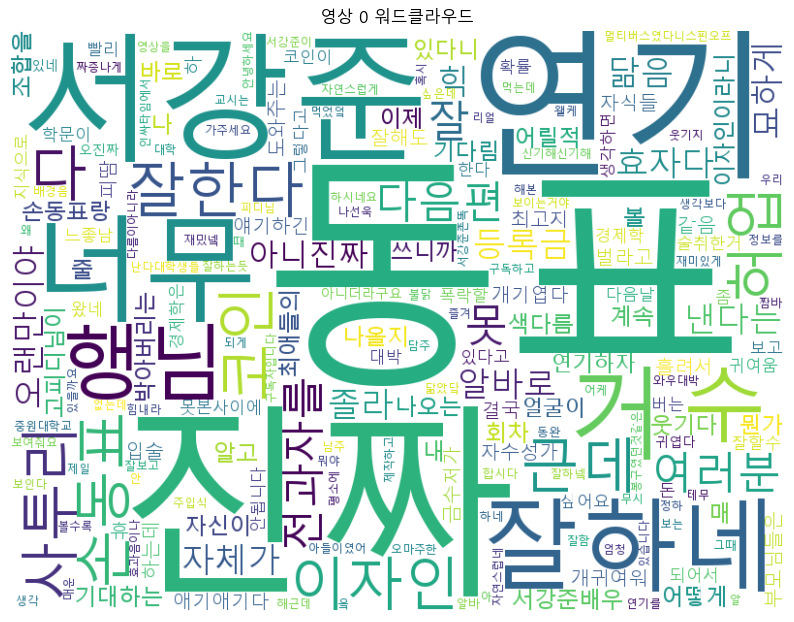

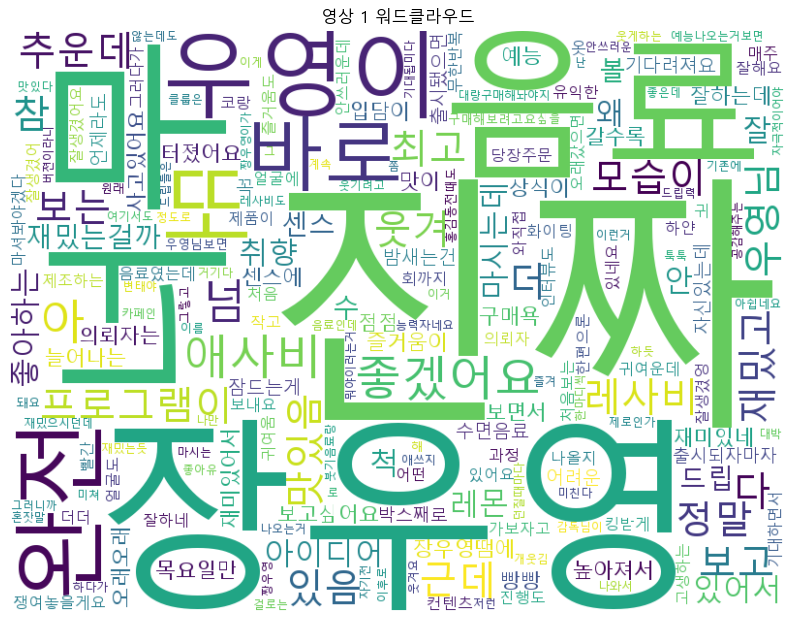

In [ ]:
for i in cleaned_comment_df.keys():
    # 모든 정제된 댓글을 하나의 문자열로 결합
    text = " ".join(cleaned_comment_df[i]['정제_내용'])
    
    # 워드클라우드 생성 (폰트 경로는 환경에 맞게 수정)
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"영상 {i} 워드클라우드")
    plt.show()
